In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
## Join DataSet Fixed sensors
df = pd.read_csv(r"./assets/Dataset_allVariables.csv", sep=",", low_memory=False)
df = df.drop(['Unnamed: 0'], axis=1)
#Data to DateTime variable
df['date'] =  pd.to_datetime(df['date'], format="%Y-%m-%d")
df.shape

(47874, 40)

In [6]:
df.columns

Index(['zone_id', 'nom_capteur', 'Quartier', 'shop', 'id_capteur_quartier',
       'type_capteur', 'address', 'zipcode', 'city', 'longitude', 'latitude',
       'date', 'year', 'Mois', 'Jour_semaine', 'Somme par jour', 'day_part',
       'Sum_part_day', 'Coef_Var', 'Coef_Var_perDay', 'avg_visits_perDay',
       'avg_visits_perSensor', 'avg_visits_perDay_perSensor',
       'avg_visits_partOfDay_perSensor', 'public_holidays_flag',
       'school_holidays_flag', 'startdate', 'enddate', 'weather_date', 'main',
       'temperature', 'temperaturefeelslike', 'temperaturemin',
       'temperaturemax', 'pressure', 'humidity', 'visibility', 'windspeed',
       'rain', 'snow'],
      dtype='object')

## Correlation between variables

In [9]:
#Prepare DataFrame
df = df.reset_index(drop=False)
corr_general_fixed = df.loc[:,['zone_id','date', 'Jour_semaine', 'Somme par jour', 'avg_visits_perDay', 'temperature', 'temperaturefeelslike', 'pressure', 'humidity',
       'visibility', 'windspeed', 'rain', 'Quartier', 'shop', 'type_capteur']]   
corr_general_fixed.drop_duplicates(inplace=True)
# Count number of days per sensor 
corr_general_fixed['number_days'] = corr_general_fixed.groupby(['zone_id'])['date'].transform('count')
#corr_general_fixed

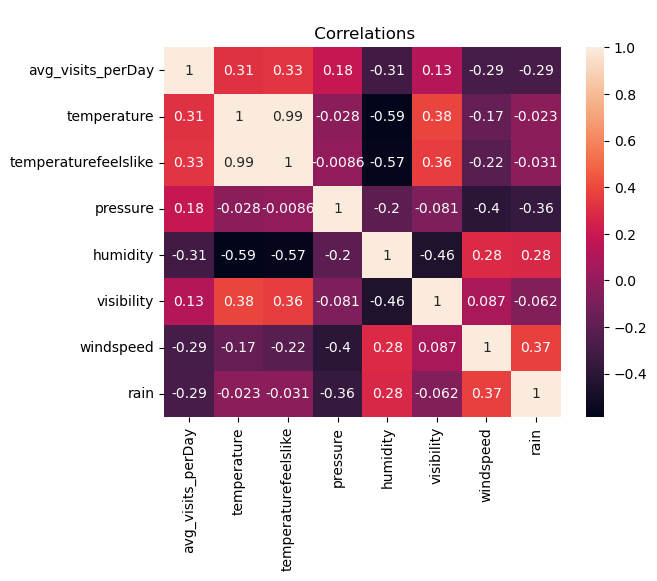

In [10]:
# Correlation matrix, only fixed sensors
columns = ['avg_visits_perDay','temperature', 'temperaturefeelslike', 'pressure', 'humidity','visibility', 'windspeed', 'rain']
corrMatrix_fix = corr_general_fixed.loc[:, columns].corr()
ax = sns.heatmap(corrMatrix_fix, annot=True)
ax.set_title('\n Correlations')
plt.show()

## Correlation weekend vs weather 

In [5]:
# Prepare DataFrame 
#Correlation matrix - weekend
corr_weekend = corr_general_fixed.loc[ (corr_general_fixed['Jour_semaine'] == 'Sunday') | (corr_general_fixed['Jour_semaine'] == 'Saturday' ), corr_general_fixed.columns != 'number_days']
corr_weekend.reset_index(drop=True, inplace=True)
corr_weekend['Jour_semaine'].value_counts()

Saturday    2311
Sunday      2205
Name: Jour_semaine, dtype: int64

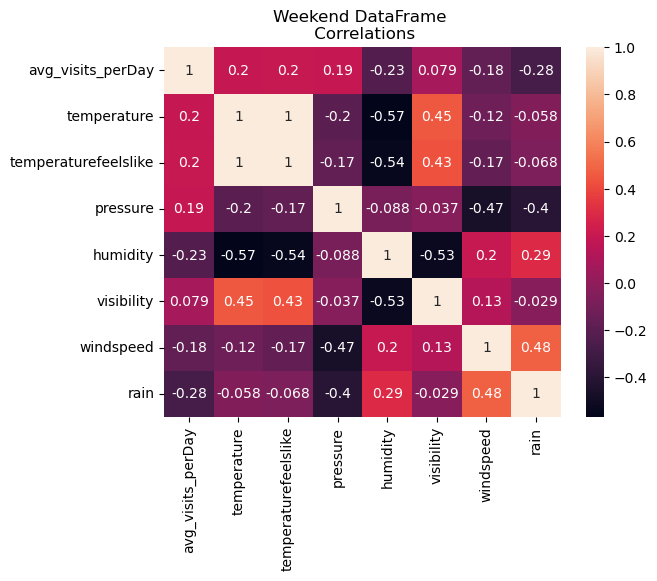

In [6]:
corrMatrix_weekend = corr_weekend.loc[:, columns].corr()
ax = sns.heatmap(corrMatrix_weekend, annot=True)
ax.set_title('Weekend DataFrame \n Correlations')
plt.show()

## Correlation weekday vs weather 

In [7]:
corr_weekday = corr_general_fixed.loc[(corr_general_fixed['Jour_semaine'] != 'Sunday') & ( corr_general_fixed['Jour_semaine'] != 'Saturday'), corr_general_fixed.columns != 'number_days']
corr_weekday.reset_index(drop=True, inplace=True)
corr_weekday['Jour_semaine'].value_counts()

Friday       2328
Wednesday    2314
Thursday     2313
Tuesday      2283
Monday       2204
Name: Jour_semaine, dtype: int64

In [8]:
corr_weekday = corr_weekday.copy()
# Count number of days per sensor 
corr_weekday['number_days'] = corr_weekday.groupby(['zone_id'])['date'].transform('count')

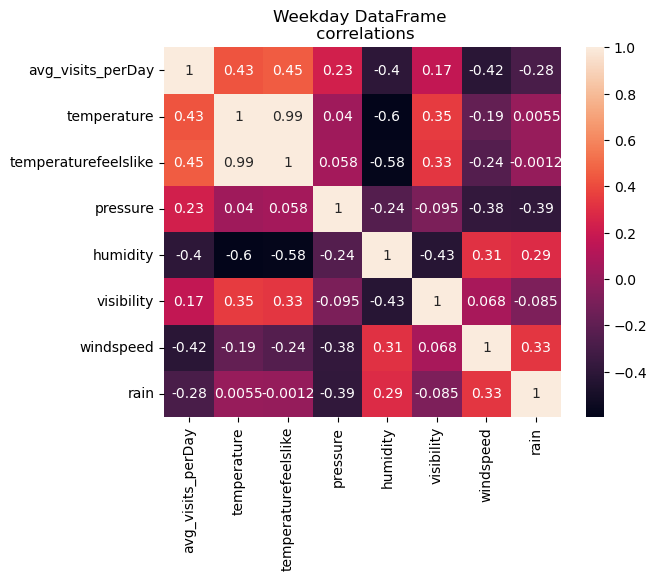

In [9]:
corrMatrix_weekday = corr_weekday.loc[:, columns].corr()
ax = sns.heatmap(corrMatrix_weekday, annot=True)
ax.set_title('Weekday DataFrame \n correlations')
plt.show()

## Function that calculates the correlation between two variables and creates a DataFrame

In [10]:
def corr(df,col_name1, col_name2):
    """ Function that calculates the correlation between 
        two variables and creates a dataframe """

    corr_Sensor = df.groupby(['zone_id', 'Quartier', 'shop','number_days'])[[col_name1, col_name2]].corr().unstack()
    corr_Sensor.columns = ['Corr_'+col_name1, 'Corr_'+col_name1+'_'+col_name2, 'Corr_'+col_name2+'_'+col_name1, 'Corr_'+col_name2+'_'+col_name2]
    corr_Sensor = corr_Sensor.drop(columns=['Corr_'+col_name1, 'Corr_'+col_name2+'_'+col_name1, 'Corr_'+col_name2+'_'+col_name2])
    corr_Sensor = corr_Sensor.sort_values('Corr_'+col_name1+'_'+col_name2, ascending=True).reset_index()  #'Corr_'+col_name1+'_'+col_name2
    
    return corr_Sensor  

## DataFrame only weekday 

In [11]:
## DataFrame only weekday 
# Call the function - correlation 'Somme par jour' and 'temperaturefeelslike'
corr_weekday_temperature =corr(corr_weekday, col_name1='Somme par jour', col_name2='temperaturefeelslike')
corr_weekday_temperature = corr_weekday_temperature.rename(columns={'Corr_Somme par jour_temperaturefeelslike': 'Corr_Weekday_Somme par jour_temperaturefeelslike'})
corr_weekday_temperature.head()

,zone_id,Quartier,shop,number_days,Corr_Weekday_Somme par jour_temperaturefeelslike
0,10151,Marolles,Machao Design,142,-0.651929
1,10185,Cureghem,Slina Hotel,269,-0.370188
2,10148,Lemonnier,Centre medical lemonnier,240,-0.249004
3,10181,Flagey,Dim yum,249,-0.230158
4,10201,Vanderkindere,The Barn,249,-0.139800


In [12]:
corr_weekday_temperature.shape

(52, 5)

# Correlations Visit vs Weather variables 
### Only fixed sensors

### Correlation 'Somme par jour' vs 'rain' by Sensor

In [13]:
# Call the function - correlation 'Somme par jour' and 'rain'
corrSensor_rain =corr(corr_general_fixed, col_name1='Somme par jour', col_name2='rain')
corrSensor_rain.shape

(52, 5)

In [14]:
# Call the function - correlation 'Somme par jour' and 'windspeed'
corrSensor_windspeed =corr(corr_general_fixed, col_name1='Somme par jour', col_name2='windspeed')
corrSensor_windspeed.shape

(52, 5)

In [15]:
# Call the function - correlation 'Somme par jour' and 'temperaturefeelslike'
corrSensor_temp =corr(corr_general_fixed, col_name1='Somme par jour', col_name2='temperaturefeelslike')
corrSensor_temp.shape

(52, 5)

In [16]:
# Call the function - correlation 'Somme par jour' and 'humidity'
corrSensor_humidity =corr(corr_general_fixed, col_name1='Somme par jour', col_name2='humidity')
corrSensor_humidity.shape

(52, 5)

In [17]:
# Call the function - correlation 'Somme par jour' and 'pressure'
corrSensor_pressure =corr(corr_general_fixed, col_name1='Somme par jour', col_name2='pressure')
corrSensor_pressure.shape

(52, 5)

In [18]:
# Call the function - correlation 'Somme par jour' and 'visibility'
corrSensor_visibility =corr(corr_general_fixed, col_name1='Somme par jour', col_name2='visibility')
corrSensor_visibility.shape

(52, 5)

## Join Correlation dataframes

In [19]:
def sort_dataframe(df1, df2, df3, df4, df5, df6, df7):
    """ Function that sort four DataFrames """
    def inner(df):
        df.sort_values('zone_id', inplace=True)
        df.reset_index(drop=True, inplace=True)
        return df 
    return (inner(df1), inner(df2), inner(df3), inner(df4), inner(df5), inner(df6), inner(df7))

# Call the function
df1, df2, df3, df4, df5, df6, df7= sort_dataframe(corrSensor_rain, corrSensor_temp, corrSensor_windspeed, corrSensor_humidity, corr_weekday_temperature, corrSensor_pressure, corrSensor_visibility)

In [20]:
df = pd.merge(df1[['zone_id','Quartier', 'shop', 'Corr_Somme par jour_rain' ]], df2[['zone_id','Corr_Somme par jour_temperaturefeelslike']], on='zone_id').merge(df3[['zone_id',
'Corr_Somme par jour_windspeed']], on='zone_id').merge(df4[['zone_id','Corr_Somme par jour_humidity']], on='zone_id').merge(df5[['zone_id',
'Corr_Weekday_Somme par jour_temperaturefeelslike']], on='zone_id').merge(df6[['zone_id','Corr_Somme par jour_pressure']], on='zone_id').merge(df7[['zone_id',
'Corr_Somme par jour_visibility']], on='zone_id')

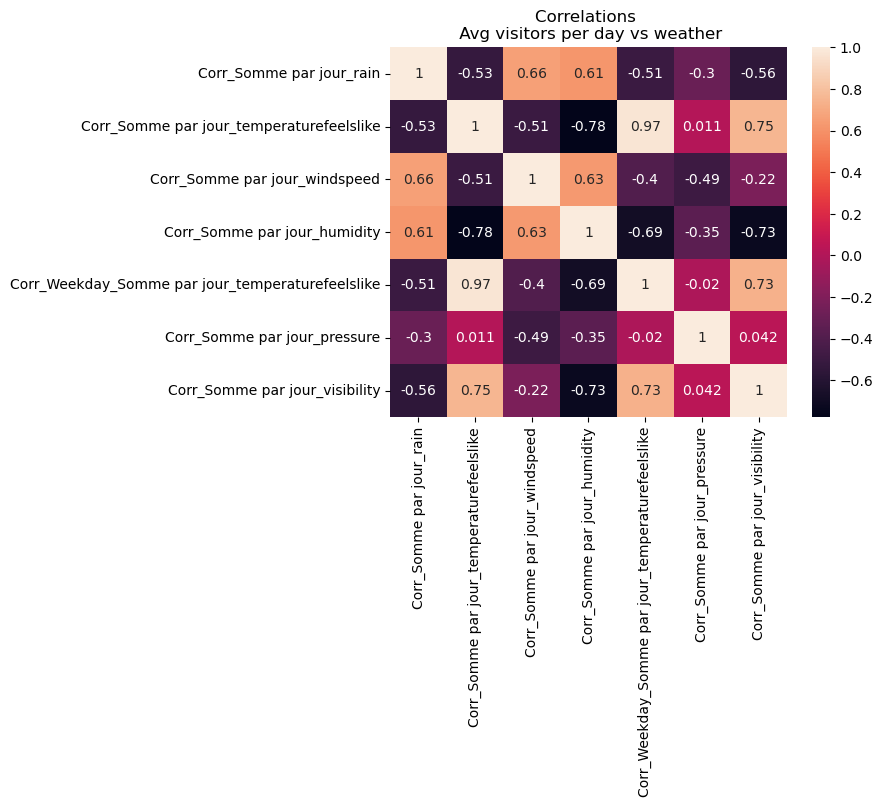

In [21]:
columns = ['Corr_Somme par jour_rain', 'Corr_Somme par jour_temperaturefeelslike', 'Corr_Somme par jour_windspeed', 'Corr_Somme par jour_humidity',
 'Corr_Weekday_Somme par jour_temperaturefeelslike', 'Corr_Somme par jour_pressure', 'Corr_Somme par jour_visibility']
corr_Matrix = df.loc[:, columns].corr()
ax = sns.heatmap(corr_Matrix, annot=True)
ax.set_title('Correlations \n Avg visitors per day vs weather')
plt.show()

In [22]:
df.to_csv('./assets/general_corr.csv')

### Correlation between the sensor -categorical variable- and 'Somme par jour' 

In [23]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Finds out the days as a list
CategoryGroupLists=corr_general_fixed.groupby('zone_id')['Somme par jour'].apply(list)

# Performing the ANOVA test 

# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0


In [24]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


corr_general_fixed.rename(columns = {"Somme par jour":"Somme_par_jour"}, inplace = True)
model = ols('Somme_par_jour ~ zone_id', data=corr_general_fixed).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
zone_id,1.406565e+07,1.0,0.188454,0.664212
Residual,1.190908e+12,15956.0,NaN,NaN


Determine whether the categorical variable (sensor) has any influence on the numerical variable:

The anova_lm() function returns the p-value (0.0).   
- if p < 0.05, this means that the categorical variable has significant influence on the numerical variable  
- if p > 0.05, this means that the categorical variable has no significant influence on the numerical variable  

Since the p-value is now 0.0 (<0.05), this means that the sensor has significant influence on the 'Somme par jour'.

# Correlations per day

In [25]:
corr_general_fixed.shape

(15958, 16)

In [26]:
# Count days per sensor 
# Check the sensor with more than 15 Mondays, 15 Tuesdays and so on 
countDays= corr_general_fixed.groupby(['zone_id', 'Jour_semaine'], as_index=False).agg({'date':'count'})
# Set index zone and day
countDays.set_index(['zone_id', 'Jour_semaine'], inplace=True)
# Filter the sensor and days with more than 15 dias
index_more15 = countDays.index[(countDays['date'] >= 15)].tolist()

In [27]:
# Set index zone and day in the reference DataFrame
corr_general_fixed.set_index(['zone_id', 'Jour_semaine'], inplace=True)
# Select the indexes
corr_general_fixed_more15 = corr_general_fixed.loc[index_more15, : ].reset_index()
corr_general_fixed_more15.shape

(15684, 16)

In [28]:
# Count number of days per sensor 
corr_general_fixed_more15['numDays_more15'] = corr_general_fixed_more15.groupby(['zone_id','Jour_semaine'])['date'].transform('count')

# Correlation each day (Somme par jour) vs weather variables 

In [29]:
# Helper nested function 
def corr(day1, day2, day3, day4, day5, day6, day7, col_name2, col_name1='Somme_par_jour',):
    """ Function that creates a correlation DataFrame per day  
        fom day1 to day7: from Monday to Sunday """
    def inner(day):
        day_df = corr_general_fixed_more15.loc[corr_general_fixed_more15.Jour_semaine.isin([day]), :]
        corr_Sensor = day_df.groupby(['zone_id'])[[col_name1, col_name2]].corr().unstack()
        corr_Sensor.columns = ['Corr_'+col_name1, 'Corr_'+col_name1+'_'+col_name2+'_'+day, 'Corr_'+col_name2+'_'+col_name1, 'Corr_'+col_name2+'_'+col_name2]
        corr_Sensor = corr_Sensor.drop(columns=['Corr_'+col_name1, 'Corr_'+col_name2+'_'+col_name1, 'Corr_'+col_name2+'_'+col_name2])
        # Sort by sensor for the Join
        corr_Sensor = corr_Sensor.sort_values('zone_id', ascending=True).reset_index()  #'Corr_'+col_name1+'_'+col_name2        
        return corr_Sensor
    return (inner(day1), inner(day2), inner(day3), inner(day4), inner(day5), inner(day6), inner(day7))



In [30]:
# Call the function - rain variable
Mon, Tue, Wed, Thu, Fri, Sat, Sun = corr('Monday','Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday', 
    col_name2='rain')
# Join the DataFrames
corr_rain = pd.merge(Mon,Tue, on='zone_id').merge(Wed, on='zone_id').merge(Thu, on='zone_id').merge(Fri, on='zone_id').merge(Sat, on='zone_id').merge(Sun, on='zone_id')
#corr_rain.head()

In [31]:
# Call the function - temperature feels like variable
Mon, Tue, Wed, Thu, Fri, Sat, Sun = corr('Monday','Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday', 
    col_name2='temperaturefeelslike')
# Join the DataFrames - variable: Temperature feels like 
corr_temperature = pd.merge(Mon,Tue, on='zone_id').merge(Wed, on='zone_id').merge(Thu, on='zone_id').merge(Fri, on='zone_id').merge(Sat, on='zone_id').merge(Sun, on='zone_id')
#corr_temperature.head()

### Join DataFrames correlation weekday vs rain & temperature feels like

In [32]:
corr_weather_perDay=pd.merge(corr_rain, corr_temperature, on='zone_id')
corr_weather_perDay.shape

In [11]:
#corr_weather_perDay.head(10)